<a href="https://colab.research.google.com/github/esdrasantos/statistical-concepts-and-practice/blob/main/cstfm_mod_9_oneway_anova_easier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd

In [20]:
from math import nan

dados = [[276, 323, 298, 256, 277, 309, 312, 265, 311],
         [243, 279, 301, 285, 274, 243, 228, 298, 255],
         [288, 292, 310, 267, 243, 293, 255, 273, nan],
         [254, 279, 241, 227, 278, 276, 256, 262, nan]]
dados

[[276, 323, 298, 256, 277, 309, 312, 265, 311],
 [243, 279, 301, 285, 274, 243, 228, 298, 255],
 [288, 292, 310, 267, 243, 293, 255, 273, nan],
 [254, 279, 241, 227, 278, 276, 256, 262, nan]]

In [21]:
df = pd.DataFrame(dados)
df = df.T
df

,0,1,2,3
0,276.0,243.0,288.0,254.0
1,323.0,279.0,292.0,279.0
2,298.0,301.0,310.0,241.0
3,256.0,285.0,267.0,227.0
4,277.0,274.0,243.0,278.0
5,309.0,243.0,293.0,276.0
6,312.0,228.0,255.0,256.0
7,265.0,298.0,273.0,262.0
8,311.0,255.0,NaN,NaN


In [22]:
df.columns = ['Segunda', 'Terça', 'Quarta', 'Quinta']
df.reset_index(drop=True, inplace=True)
df

,Segunda,Terça,Quarta,Quinta
0,276.0,243.0,288.0,254.0
1,323.0,279.0,292.0,279.0
2,298.0,301.0,310.0,241.0
3,256.0,285.0,267.0,227.0
4,277.0,274.0,243.0,278.0
5,309.0,243.0,293.0,276.0
6,312.0,228.0,255.0,256.0
7,265.0,298.0,273.0,262.0
8,311.0,255.0,NaN,NaN


In [23]:
alpha = 0.05

In [24]:
from scipy.stats import f_oneway

segunda = df['Segunda'].dropna()
terca = df['Terça'].dropna()
quarta = df['Quarta'].dropna()
quinta = df['Quinta'].dropna()

f_stat, p_value = f_oneway(segunda, terca, quarta, quinta)

print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 3.24264815156684
p-value: 0.03573533519950801


In [31]:
# DECISION

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("Therefore, the group means are not the same.")
    print("Tukey's test is needed to verify the rejection.")
else:
    print("Fail to reject the null hypothesis.")
    print("Therefore, the group means are the same.")
    print("No test is needed.")

Reject the null hypothesis.
Therefore, the group means are not the same.
Tukey's test is needed to verify the rejection.


In [36]:
# Stacking data into a long dataframe for Tukey test

df_tukey = pd.DataFrame({
    'Group': ['Segunda'] * len(segunda) + ['Terça'] * len(terca) + ['Quarta'] * len(quarta) + ['Quinta'] * len(quinta),
    'Value': list(segunda) + list(terca) + list(quarta) + list(quinta)
})

print(df_tukey)

      Group  Value
0   Segunda  276.0
1   Segunda  323.0
2   Segunda  298.0
3   Segunda  256.0
4   Segunda  277.0
5   Segunda  309.0
6   Segunda  312.0
7   Segunda  265.0
8   Segunda  311.0
9     Terça  243.0
10    Terça  279.0
11    Terça  301.0
12    Terça  285.0
13    Terça  274.0
14    Terça  243.0
15    Terça  228.0
16    Terça  298.0
17    Terça  255.0
18   Quarta  288.0
19   Quarta  292.0
20   Quarta  310.0
21   Quarta  267.0
22   Quarta  243.0
23   Quarta  293.0
24   Quarta  255.0
25   Quarta  273.0
26   Quinta  254.0
27   Quinta  279.0
28   Quinta  241.0
29   Quinta  227.0
30   Quinta  278.0
31   Quinta  276.0
32   Quinta  256.0
33   Quinta  262.0


In [38]:
# TUKEY PAIRED TEST

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_result = pairwise_tukeyhsd(df_tukey.Value, df_tukey.Group, alpha=alpha)

print(tukey_result)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------
 Quarta  Quinta    -18.5 0.3896 -49.7871 12.7871  False
 Quarta Segunda  14.2639 0.5851 -16.1417 44.6695  False
 Quarta   Terça -10.2917 0.7942 -40.6973  20.114  False
 Quinta Segunda  32.7639 0.0309   2.3583 63.1695   True
 Quinta   Terça   8.2083 0.8826 -22.1973  38.614  False
Segunda   Terça -24.5556 0.1296 -54.0533  4.9422  False
-------------------------------------------------------


In [41]:
tukey_result.reject2

array([False, False, False,  True, False, False])

In [49]:
rejected_pairs = pd.DataFrame(
    tukey_result._results_table.data[1:],
    columns=tukey_result._results_table.data[0]
).query("reject == True")

rejected_pairs

,group1,group2,meandiff,p-adj,lower,upper,reject
3,Quinta,Segunda,32.7639,0.0309,2.3583,63.1695,True


In [57]:
# DECISION ACCORDING TO POST-HOC TEST

if True in tukey_result.reject:
    print("Pairwise rejected.\n")
    print("Summary\n", tukey_result.summary(), "\n")
    print("Where the rejection occurred:\n", rejected_pairs)
else:
    print("No pairwise rejected.")


Pairwise rejected.

Summary
   Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------
 Quarta  Quinta    -18.5 0.3896 -49.7871 12.7871  False
 Quarta Segunda  14.2639 0.5851 -16.1417 44.6695  False
 Quarta   Terça -10.2917 0.7942 -40.6973  20.114  False
 Quinta Segunda  32.7639 0.0309   2.3583 63.1695   True
 Quinta   Terça   8.2083 0.8826 -22.1973  38.614  False
Segunda   Terça -24.5556 0.1296 -54.0533  4.9422  False
------------------------------------------------------- 

Where the rejection occurred:
    group1   group2  meandiff   p-adj   lower    upper  reject
3  Quinta  Segunda   32.7639  0.0309  2.3583  63.1695    True


<Axes: >

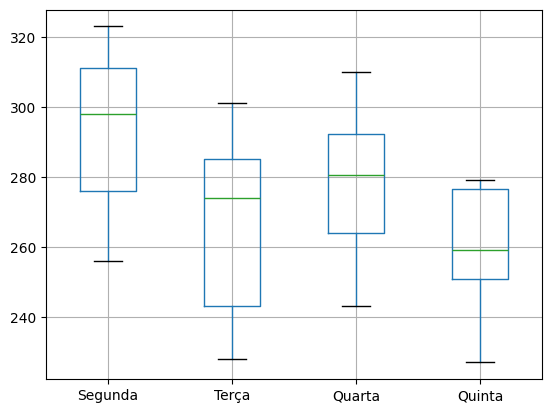

In [58]:
df.boxplot()